In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt

In [129]:
col_names=['rayon','cat','sub1','sub2','sub3','sub4','sub5','name','price']
df = pd.read_csv('./data1_all.csv',encoding='utf-8',names = col_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33458 entries, 0 to 33457
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rayon   33458 non-null  object
 1   cat     33458 non-null  object
 2   sub1    33120 non-null  object
 3   sub2    2276 non-null   object
 4   sub3    120 non-null    object
 5   sub4    4 non-null      object
 6   sub5    2 non-null      object
 7   name    33458 non-null  object
 8   price   33458 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


In [130]:
df.sample(10)

,rayon,cat,sub1,sub2,sub3,sub4,sub5,name,price
25660,MAISON | BRICO & ANIMALERIE,ANIMALERIE,Chiens,NaN,NaN,NaN,NaN,Spray Brillance Jojoba BEAPHAR Pour Animaux 25...,29.000 TND
3355,ÉLECTROMENAGER,Gros Electroménager,Cuisinière,NaN,NaN,NaN,NaN,Cuisinière ORIENT OC-50-60SIT Avec Tourne Broc...,569.000 TND
12186,TV | PHOTO & SON,Accessoires Téléviseurs,Câbles vidéo,NaN,NaN,NaN,NaN,Câble HDMI Haute Vitesse HAMA Classic Line 1.5...,38.000 TND
19370,RESEAUX & SECURITE,Reseaux,Serveur de Stockage,NaN,NaN,NaN,NaN,Serveur NAS QNAP TS230 2 baies (Sans Disque dur),669.000 TND
21027,IMPRESSION,Consommables,Toner,NaN,NaN,NaN,NaN,Tambour HP imprimante LASER JET d’origine MFP ...,299.000 TND
25305,MODE BEAUTÉ & SANTÉ,Parfums,Eau de Parfum,NaN,NaN,NaN,NaN,Eau de Parfum Pour Femme EMPER VANITY 80ml,55.000 TND
30446,INFORMATIQUE,Ordinateurs portables,PC Gamer,NaN,NaN,NaN,NaN,PC Portable Gamer MSI GF63 Thin i7 11è Gén 12G...,2 835.000 TND
20080,IMPRESSION,Consommables,Cartouche,NaN,NaN,NaN,NaN,Cartouche d'encre Original DesignJet HP 72 130...,299.000 TND
28711,INFORMATIQUE,Périphériques & Accessoires,Sacs & Sacoches,NaN,NaN,NaN,NaN,"Sacoche RIVACASE 7730 Pour Pc Portable 15.6"" -...",99.000 TND
8607,TELEPHONIE,Accessoires Téléphonie,Etuis et coques,NaN,NaN,NaN,NaN,Coque Silicone Pour SAMSUNG Galaxy A52 - Bleu,15.000 TND


In [131]:
#cleaning price
df.price = df.price.replace(r'[^0-9]','',regex=True)
df = df.astype({'price' :'float'})
df.price = df.price / 1000
df.sample(10)

,rayon,cat,sub1,sub2,sub3,sub4,sub5,name,price
29027,INFORMATIQUE,Ordinateur de bureau,Ecran,NaN,NaN,NaN,NaN,"Ecran DELL E2420HS 24"" Full HD 60Hz",579.0
10452,TV | PHOTO & SON,Home Cinéma,Barre de Son,NaN,NaN,NaN,NaN,Barre de Son Gamer REDRAGON ADIEMUS GS560,99.0
12676,TV | PHOTO & SON,Son Numérique,Haut-Parleur,NaN,NaN,NaN,NaN,Enceinte XIAOMI Mi Smart Speaker Wi-Fi Bluetoo...,189.0
19770,INFORMATIQUE,Ordinateurs portables,Pc Portable,NaN,NaN,NaN,NaN,Pc Portable ACER Aspire 3 A315-56 i5 10è Gén 8...,1669.0
15238,MAISON | BRICO & ANIMALERIE,ANIMALERIE,Chiens,Accessoires Chien,Collier Fodera ZANILOVE 2,NaN,NaN,5 x 65 cm - Noir,14.0
32445,MAISON | BRICO & ANIMALERIE,ANIMALERIE,Chiens,NaN,NaN,NaN,NaN,Nourriture sèche ROYAL CANIN Pour Chien Medium...,320.0
13970,MAISON | BRICO & ANIMALERIE,ANIMALERIE,Chats,Nourriture Chat,NaN,NaN,NaN,Barquette PLAISIR Poulet Lait Pour Chat 100gr,2.9
5329,TELEPHONIE,Accessoires Téléphonie,Câble Chargeur,NaN,NaN,NaN,NaN,Câble EZRA DC19 2A Type C - Blanc,8.0
3108,ÉLECTROMENAGER,Préparation culinaire,Batteur,NaN,NaN,NaN,NaN,Mixeur Plongeant MOULINEX Quickchef 3en1 1000W...,279.0
32365,INFORMATIQUE,Ordinateur de bureau,Ordinateur Gamer,NaN,NaN,NaN,NaN,Pc de Bureau Gamer MSI INFINITY GRAGON i5 12è ...,5999.0


<AxesSubplot:>

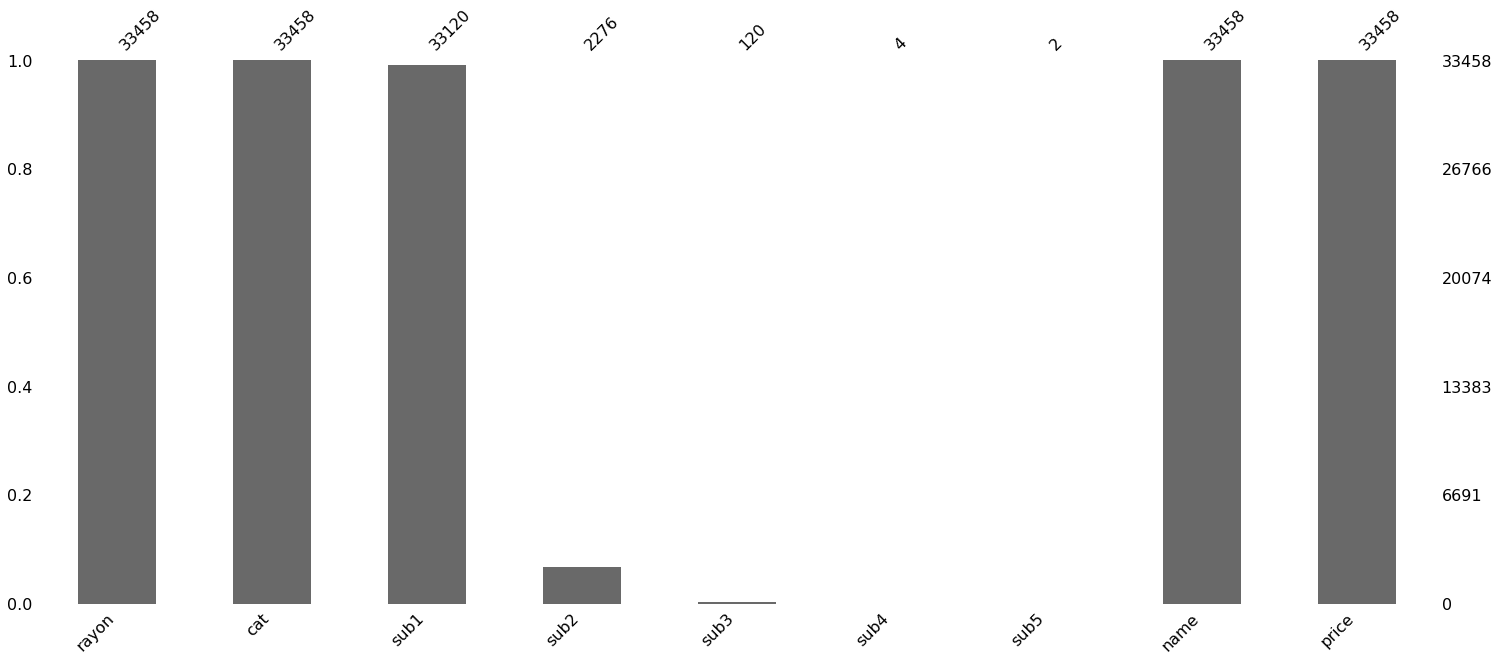

In [132]:
msno.bar(df)
#remove the guys that have sub3 or sub4 for the overall analysis ( can be retreived if needed)
#to do this we will merge all the subs in sub 1 


In [133]:
#merged all under sub
df.loc[:,"sub2":"sub5"] = df.loc[:,"sub2":"sub5"].fillna('')
df["sub"] = df["sub1"]+df["sub2"]+df["sub3"]+df["sub4"]+df["sub5"]
df["sub"] = df["sub"].replace(r'(>)$','',regex=True)
df["sub"] 


0        Pc Portable
1        Pc Portable
2        Pc Portable
3        Pc Portable
4        Pc Portable
            ...     
33453    Pc Portable
33454    Pc Portable
33455    Pc Portable
33456    Pc Portable
33457    Pc Portable
Name: sub, Length: 33458, dtype: object

In [134]:
df["sub"].describe()

count           33120
unique            538
top       Pc Portable
freq             2366
Name: sub, dtype: object

In [135]:
df = df.drop(columns=["sub1","sub2","sub3","sub4","sub5"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33458 entries, 0 to 33457
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rayon   33458 non-null  object 
 1   cat     33458 non-null  object 
 2   name    33458 non-null  object 
 3   price   33458 non-null  float64
 4   sub     33120 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 23886 to 30971
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rayon   338 non-null    object 
 1   cat     338 non-null    object 
 2   name    338 non-null    object 
 3   price   338 non-null    float64
 4   sub     0 non-null      object 
dtypes: float64(1), object(4)
memory usage: 15.8+ KB


,rayon,cat,name,price,sub
26498,JEUX & JOUETS,Jeux de Plein Air,Ensemble De Basket-ball & Football PILSAN Magi...,75.0,NaN
24863,JEUX & JOUETS,Jeux de Plein Air,Ballon de Foot B0012 - Couleur Assortis,25.0,NaN
27164,JEUX & JOUETS,Jeux de Plein Air,Trottinettes Pour Enfants - Bleu (8182-BLEU),125.0,NaN
26492,JEUX & JOUETS,Jeux de Plein Air,Jeux De Fléchettes FLOCKED DART Game Double Fa...,59.0,NaN
24864,JEUX & JOUETS,Jeux de Plein Air,Seau à Sable Magique PILSAN 500gr 01020N,21.9,NaN
26741,JEUX & JOUETS,Jeux de Plein Air,Piscine gonflable Pour enfant INTEX Arc en Cie...,105.0,NaN
26161,JEUX & JOUETS,Jeux de Plein Air,Matelas De Natation Gonflable INTEX À Rouler -...,55.0,NaN
25243,JEUX & JOUETS,Jeux de Plein Air,Jeu De Golf Pour Enfants - Assortis (905),29.0,NaN
30647,JEUX & JOUETS,Jeux de Plein Air,Toboggan PILSAN Avec Panier Et Balançoire Ondu...,949.0,NaN
29572,JEUX & JOUETS,Jeux de Plein Air,Aire De Jeux Gonflable INTEX Mon Jardin,399.0,NaN


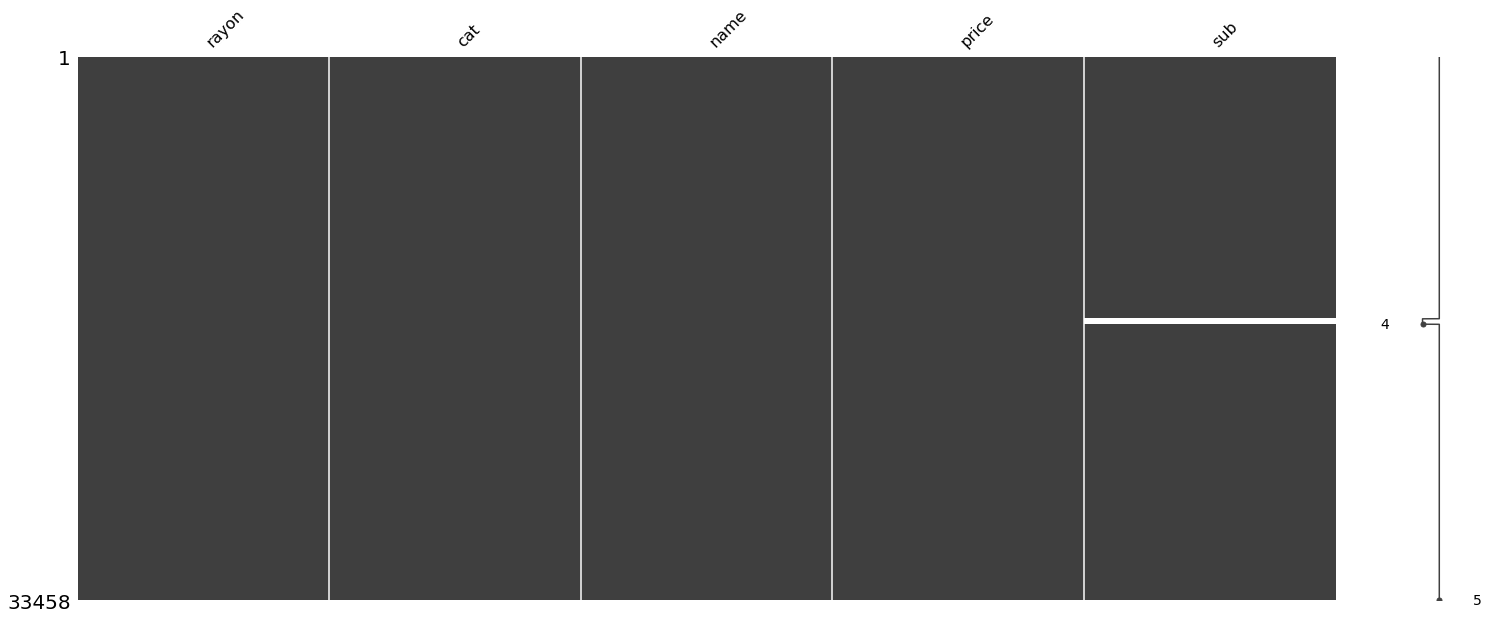

In [136]:
df = df.sort_values(by=['cat','sub','price'])
msno.matrix(df)
null_sub = (df[df.isna()["sub"]])
null_sub.info()
null_sub.sample(10)

In [137]:
#let's see the main categories :
df.rayon.unique()

array(['BUREAUTIQUE', 'MAISON | BRICO & ANIMALERIE', 'TV | PHOTO & SON',
       'IMPRESSION', 'TELEPHONIE', 'GAMING', 'ÉLECTROMENAGER',
       'MOTO | SPORTS & LOISIRS', 'MODE BEAUTÉ & SANTÉ', 'BÉBÉ',
       'RESEAUX & SECURITE', 'INFORMATIQUE', 'JEUX & JOUETS'],
      dtype=object)

<AxesSubplot:title={'center':'Tous Les Rayons'}, xlabel='rayon', ylabel='count'>

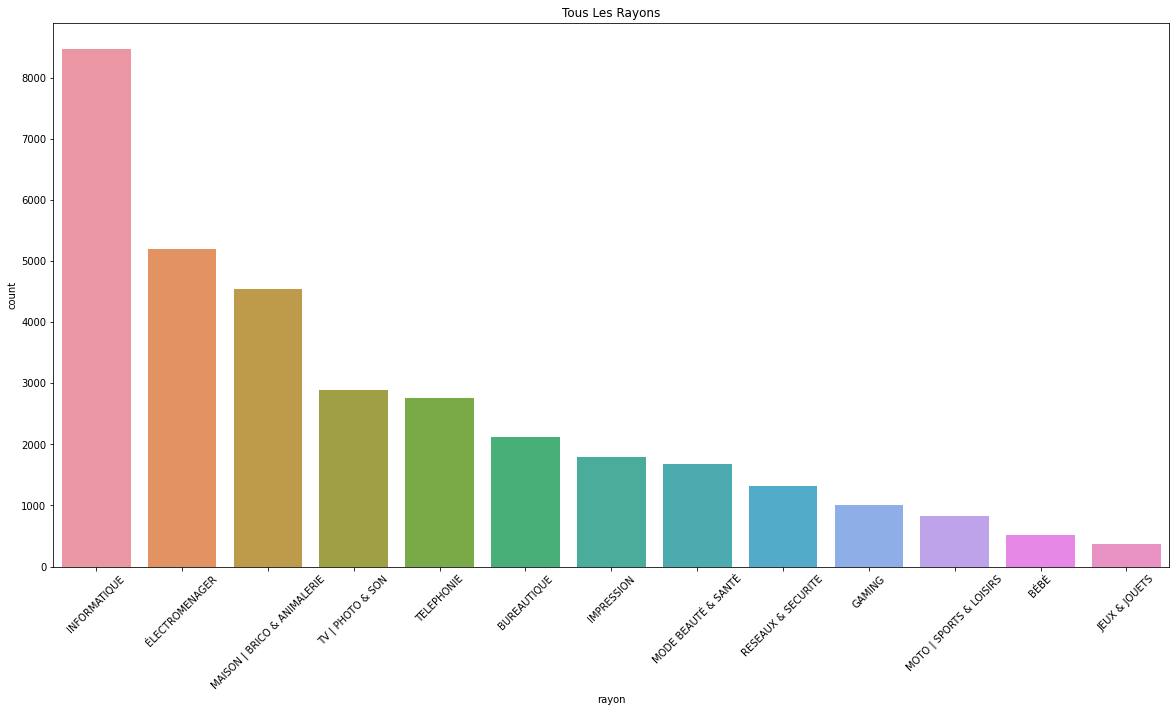

In [138]:
fig_c,ax_c = plt.subplots(figsize=(20,10))
ax_c.set_title("Tous Les Rayons")
plt.xticks(rotation=45)
sns.countplot(data = df , x='rayon',ax=ax_c,order=df.groupby('rayon').size().sort_values(ascending=False).index)


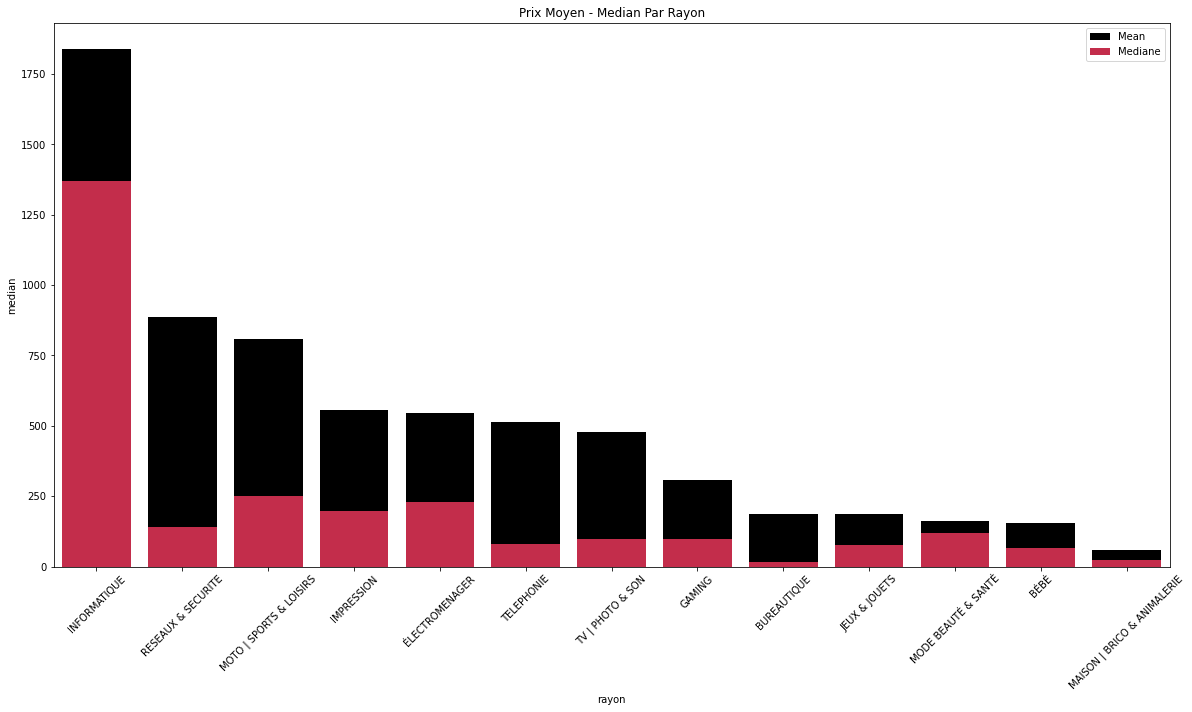

In [177]:
#Checking The Price
fig_c,ax_c = plt.subplots(figsize=(20,10))
ax_c.set_title("Prix Moyen - Median Par Rayon")
plt.xticks(rotation=45)
mean_median_rayon = df.groupby('rayon').price.agg(['mean','median']).sort_values(by='mean',ascending=False)
sns.barplot(data = mean_median_rayon.reset_index(),x='rayon',y='mean',ax=ax_c,color="Black",label='Mean')
sns.barplot(data = mean_median_rayon.reset_index(),x='rayon',y='median',ax=ax_c,color="crimson",label='Mediane')
plt.legend()


<AxesSubplot:xlabel='rayon', ylabel='price'>

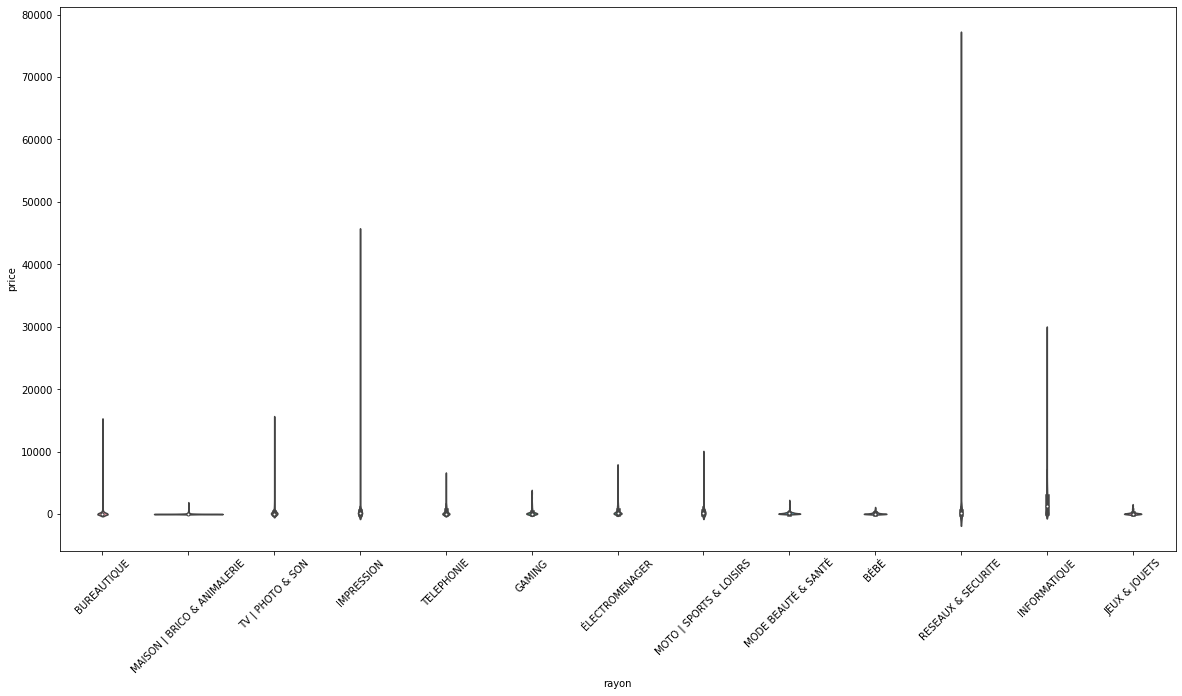

In [209]:
fig_c,ax_c = plt.subplots(figsize=(20,10))
plt.xticks(rotation=45)
sns.violinplot(data=df,x='rayon',y='price',ax=ax_c)
#Waaaay to Spread let's add the log

<AxesSubplot:xlabel='rayon', ylabel='log_price'>

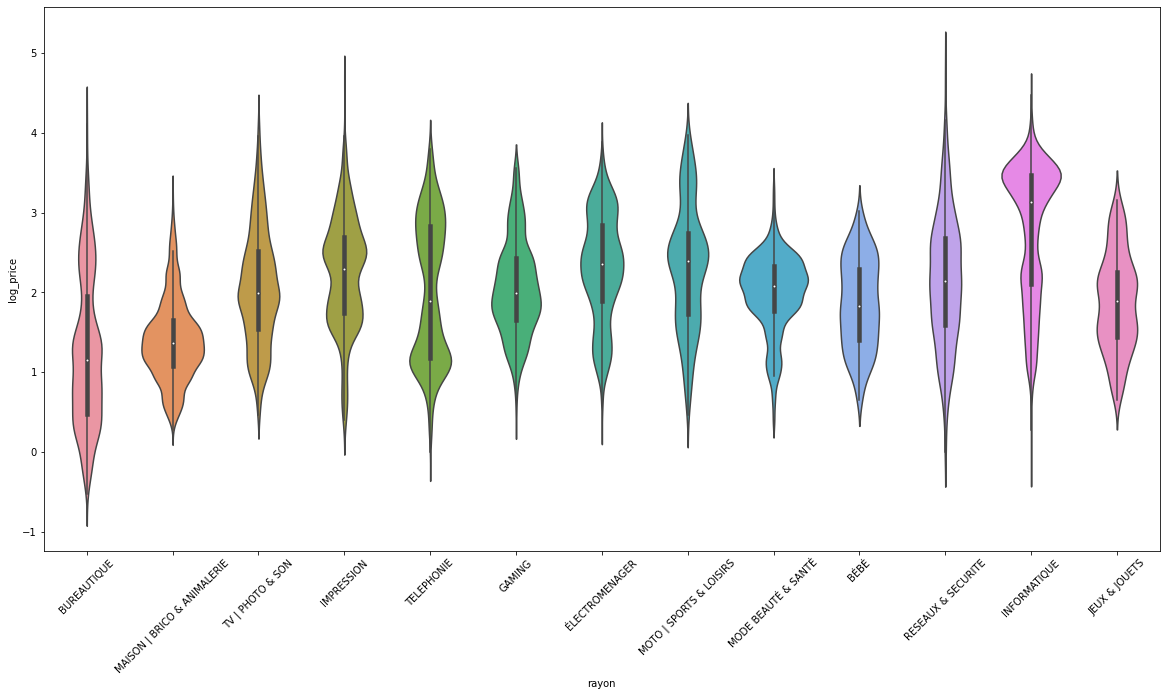

In [208]:
fig_c,ax_c = plt.subplots(figsize=(20,10))
plt.xticks(rotation=45)
temp_df = df.assign(log_price = lambda d: np.log10(d.price)) 
plt.xticks(rotation=45)
sns.violinplot(data=temp_df,x='rayon',y='log_price',ax=ax_c)


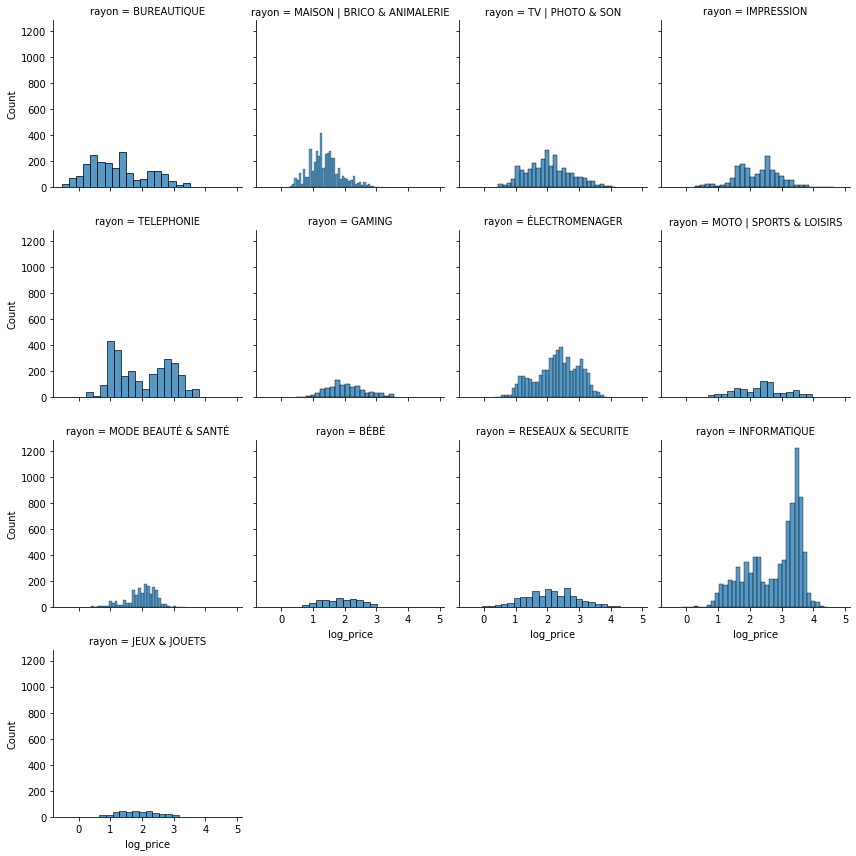

In [234]:
w = sns.FacetGrid(data=temp_df,col='rayon',col_wrap=4)
w.map(sns.histplot,'log_price')